# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [59]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [60]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-03-22 08:33:02--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip.1’

creditCardFraud.zip 100%[===================>]  65.95M   352MB/s    in 0.2s    

2023-03-22 08:33:03 (352 MB/s) - ‘creditCardFraud.zip.1’ saved [69155672/69155672]



* 다운로드 결과 확인

In [61]:
!ls -l 

total 282372
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 22 07:01 creditCardFraud.zip
-rw-r--r-- 1 root root  69155672 Mar 22 08:33 creditCardFraud.zip.1
drwxr-xr-x 1 root root      4096 Mar 20 13:36 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [62]:
!unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


* creditcard.csv 파일 확인

In [63]:
!ls -l

total 282372
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 22 07:01 creditCardFraud.zip
-rw-r--r-- 1 root root  69155672 Mar 22 08:33 creditCardFraud.zip.1
drwxr-xr-x 1 root root      4096 Mar 20 13:36 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [64]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [65]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [66]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [67]:
DF.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [68]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) Visualization

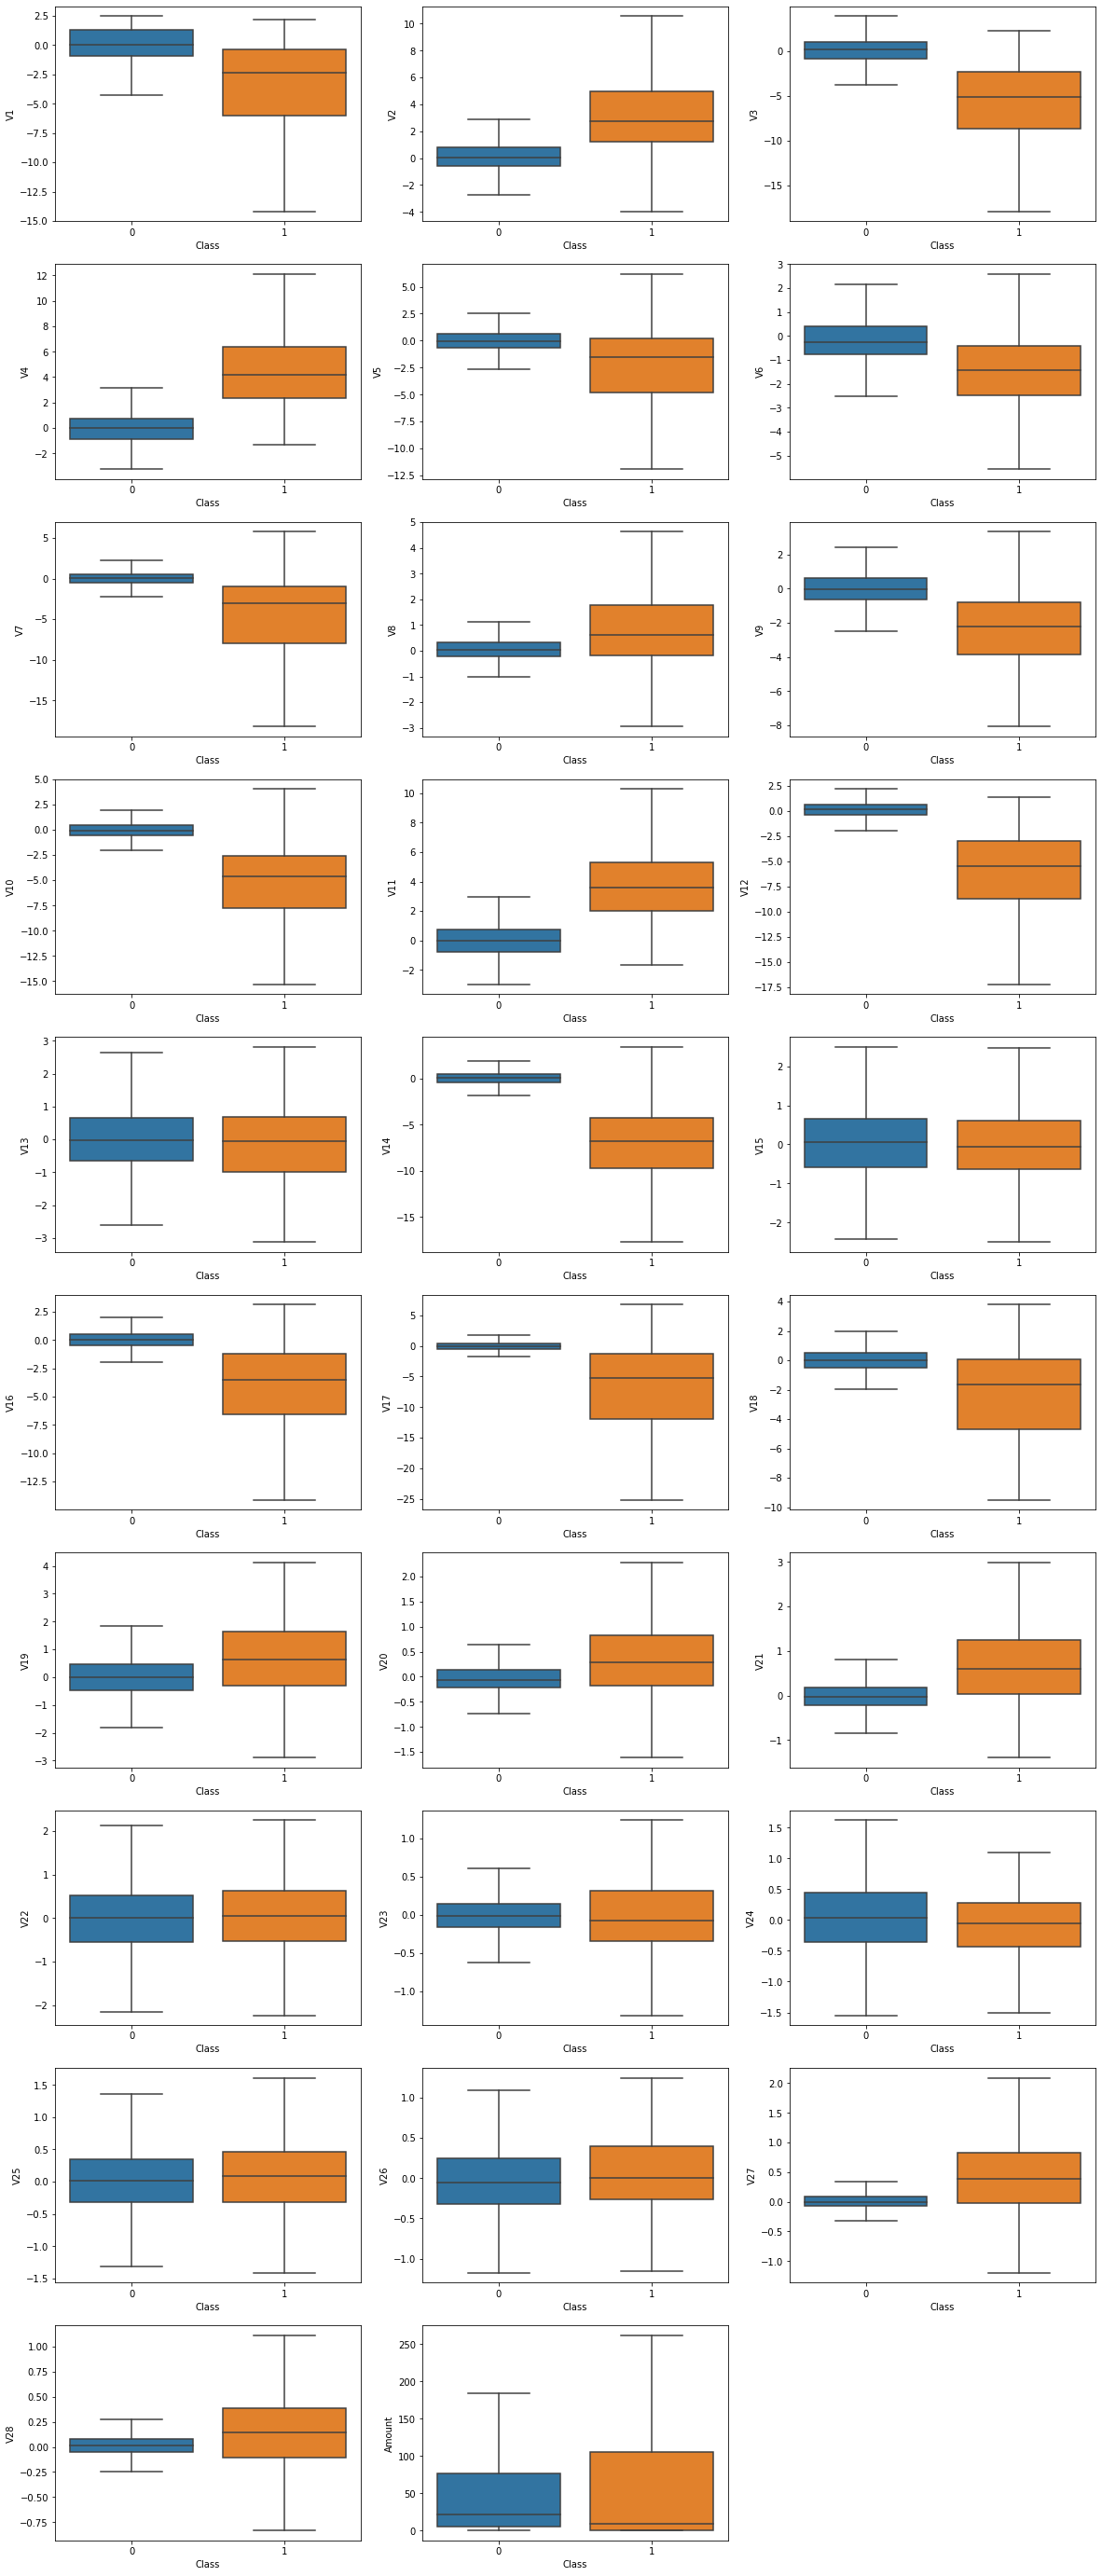

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 50))

for index, col_names in enumerate(DF.columns[:-1]):
  ax1 = plt.subplot(10, 3, index + 1)
  sns.boxplot(data = DF,
              x = 'Class', 
              y = col_names,
              order = [0, 1],
              showfliers = False, # 이상치제거
              ax = ax1)
  
plt.show()

# III. train_test_split( )

* X (Input), y (Output) 지정
 - 7: 3
 - random_state = 2045

In [70]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state= 2045, stratify = y)

# IV. Modeling - Logistic Regression

In [72]:
%%time 
#시간재는 파이썬함수
from sklearn.linear_model import LogisticRegression
model_lg= LogisticRegression()
model_lg.fit(x_train, y_train)
pred_lg = model_lg.predict(x_test)

CPU times: user 3.63 s, sys: 990 ms, total: 4.62 s
Wall time: 3.29 s


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lg,  digits= 3))

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     71079
           1      0.876     0.691     0.773       123

    accuracy                          0.999     71202
   macro avg      0.938     0.845     0.886     71202
weighted avg      0.999     0.999     0.999     71202



In [74]:
from sklearn.metrics import recall_score
print(recall_score(y_test, pred_lg))

0.6910569105691057


# V. Modeling - Decison Tree

In [75]:
%%time 
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)

CPU times: user 22.9 s, sys: 27.7 ms, total: 22.9 s
Wall time: 22.9 s


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dt,  digits= 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     71079
           1      0.739     0.805     0.770       123

    accuracy                          0.999     71202
   macro avg      0.869     0.902     0.885     71202
weighted avg      0.999     0.999     0.999     71202



In [77]:
from sklearn.metrics import recall_score
print(recall_score(y_test, pred_dt))

0.8048780487804879


In [78]:
params= {'criterion':['gini','entropy']}

In [79]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model_dt, 
                      param_grid= params, 
                      refit= True,
                      n_jobs= -1)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']})

In [80]:
grid_search.best_params_

{'criterion': 'gini'}

> ## Feature Importance

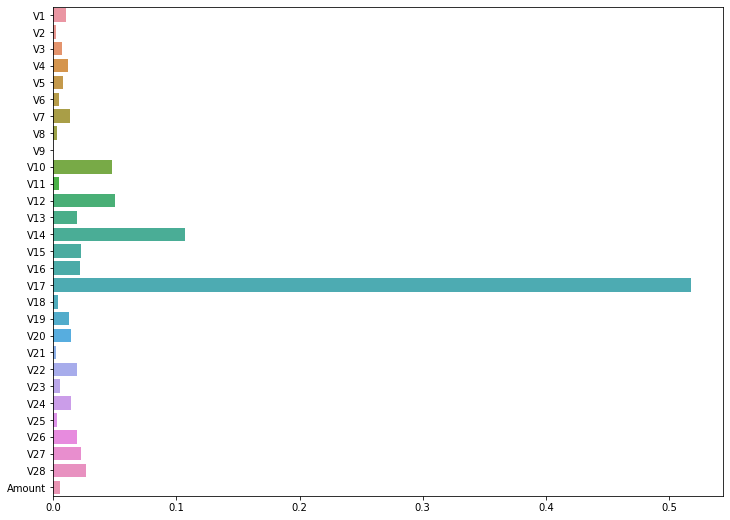

In [86]:
plt.figure(figsize = (12, 9))
sns.barplot(x = model_dt.feature_importances_,
            y = x_train.columns)
plt.show()

# VI. Modeling - RandomForest (Ensemble)

In [81]:
%%time 
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

CPU times: user 3min 37s, sys: 211 ms, total: 3min 37s
Wall time: 3min 55s


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf,  digits= 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     71079
           1      0.944     0.821     0.878       123

    accuracy                          1.000     71202
   macro avg      0.972     0.911     0.939     71202
weighted avg      1.000     1.000     1.000     71202



In [83]:
from sklearn.metrics import recall_score
print(recall_score(y_test, pred_rf))

0.8211382113821138


> ## Feature Importance

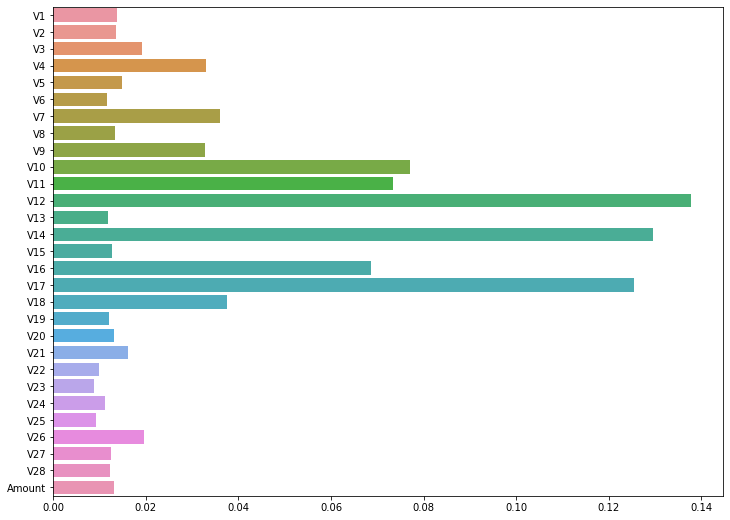

In [85]:
plt.figure(figsize = (12, 9))
sns.barplot(x = model_rf.feature_importances_,
            y = x_train.columns)
plt.show()

# 
# 
# 
# The End
# 
# 
# 